# Metody Eksploracji Danych - Projekt

## Opis projektu
### Zespół:

1. Jakub Korczakowski, nr albumu 291079
2. Piotr Rosa, nr albumu 291112

### Zbiór danych:

Nieznormalizowany, którego będziemy używac do eksploracyjnej analizy danych: Communities and Crime Data Set

https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized


Znormalizowany, którego będziemy używac przy uczeniu: Communities and Crime Data Set

https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

### Cel:

Znalezienie współczynnika ilości przestępstw.

## Eksploracyjna analiza danych 

### Wczytanie potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

### Wczytanie danych nieznormalizowanych

In [3]:
columns = ["communityname" , "state" , "countyCode" , "communityCode" , "fold" , "population" , "householdsize" , "racepctblack" , "racePctWhite" , "racePctAsian" , "racePctHisp" , "agePct12t21" , "agePct12t29" , "agePct16t24" , "agePct65up" , "numbUrban" , "pctUrban" , "medIncome" , "pctWWage" , "pctWFarmSelf" , "pctWInvInc" , "pctWSocSec" , "pctWPubAsst" , "pctWRetire" , "medFamInc" , "perCapInc" , "whitePerCap" , "blackPerCap" , "indianPerCap" , "AsianPerCap" , "OtherPerCap" , "HispPerCap" , "NumUnderPov" , "PctPopUnderPov" , "PctLess9thGrade" , "PctNotHSGrad" , "PctBSorMore" , "PctUnemployed" , "PctEmploy" , "PctEmplManu" , "PctEmplProfServ" , "PctOccupManu" , "PctOccupMgmtProf" , "MalePctDivorce" , "MalePctNevMarr" , "FemalePctDiv" , "TotalPctDiv" , "PersPerFam" , "PctFam2Par" , "PctKids2Par" , "PctYoungKids2Par" , "PctTeen2Par" , "PctWorkMomYoungKids" , "PctWorkMom" , "NumKidsBornNeverMar" , "PctKidsBornNeverMar" , "NumImmig" , "PctImmigRecent" , "PctImmigRec5" , "PctImmigRec8" , "PctImmigRec10" , "PctRecentImmig" , "PctRecImmig5" , "PctRecImmig8" , "PctRecImmig10" , "PctSpeakEnglOnly" , "PctNotSpeakEnglWell" , "PctLargHouseFam" , "PctLargHouseOccup" , "PersPerOccupHous" , "PersPerOwnOccHous" , "PersPerRentOccHous" , "PctPersOwnOccup" , "PctPersDenseHous" , "PctHousLess3BR" , "MedNumBR" , "HousVacant" , "PctHousOccup" , "PctHousOwnOcc" , "PctVacantBoarded" , "PctVacMore6Mos" , "MedYrHousBuilt" , "PctHousNoPhone" , "PctWOFullPlumb" , "OwnOccLowQuart" , "OwnOccMedVal" , "OwnOccHiQuart" , "OwnOccQrange" , "RentLowQ" , "RentMedian" , "RentHighQ" , "RentQrange" , "MedRent" , "MedRentPctHousInc" , "MedOwnCostPctInc" , "MedOwnCostPctIncNoMtg" , "NumInShelters" , "NumStreet" , "PctForeignBorn" , "PctBornSameState" , "PctSameHouse85" , "PctSameCity85" , "PctSameState85" , "LemasSwornFT" , "LemasSwFTPerPop" , "LemasSwFTFieldOps" , "LemasSwFTFieldPerPop" , "LemasTotalReq" , "LemasTotReqPerPop" , "PolicReqPerOffic" , "PolicPerPop" , "RacialMatchCommPol" , "PctPolicWhite" , "PctPolicBlack" , "PctPolicHisp" , "PctPolicAsian" , "PctPolicMinor" , "OfficAssgnDrugUnits" , "NumKindsDrugsSeiz" , "PolicAveOTWorked" , "LandArea" , "PopDens" , "PctUsePubTrans" , "PolicCars" , "PolicOperBudg" , "LemasPctPolicOnPatr" , "LemasGangUnitDeploy" , "LemasPctOfficDrugUn" , "PolicBudgPerPop" , "murders" , "murdPerPop" , "rapes" , "rapesPerPop" , "robberies" , "robbbPerPop" , "assaults" , "assaultPerPop" , "burglaries" , "burglPerPop" , "larcenies" , "larcPerPop" , "autoTheft" , "autoTheftPerPop" , "arsons" , "arsonsPerPop" , "ViolentCrimesPerPop" , "nonViolPerPop"]
dataset = pd.read_csv("../Data/CommViolPredUnnormalizedData.txt", names=columns)

In [4]:
dataset.shape

(2215, 147)

In [5]:
dataset.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


### Sprawdzenie stopnia wypełnienia danych

Zamiana znaku ``?`` na wartość ``np.nan``.

In [6]:
dataset.replace("?", np.nan, inplace=True)

In [7]:
dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 147 columns):
communityname            2215 non-null object
state                    2215 non-null object
countyCode               994 non-null object
communityCode            991 non-null object
fold                     2215 non-null int64
population               2215 non-null int64
householdsize            2215 non-null float64
racepctblack             2215 non-null float64
racePctWhite             2215 non-null float64
racePctAsian             2215 non-null float64
racePctHisp              2215 non-null float64
agePct12t21              2215 non-null float64
agePct12t29              2215 non-null float64
agePct16t24              2215 non-null float64
agePct65up               2215 non-null float64
numbUrban                2215 non-null int64
pctUrban                 2215 non-null float64
medIncome                2215 non-null int64
pctWWage                 2215 non-null float64
pctWFarmSelf 

Zmiana kolumn typu ``object`` na typ ``numeric``.

In [8]:
for column in dataset.columns:
    if (column not in ["communityname", "state"]) and (dataset[column].dtype == object): 
#         print(column)
        dataset[column] = pd.to_numeric(dataset[column])

In [9]:
dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 147 columns):
communityname            2215 non-null object
state                    2215 non-null object
countyCode               994 non-null float64
communityCode            991 non-null float64
fold                     2215 non-null int64
population               2215 non-null int64
householdsize            2215 non-null float64
racepctblack             2215 non-null float64
racePctWhite             2215 non-null float64
racePctAsian             2215 non-null float64
racePctHisp              2215 non-null float64
agePct12t21              2215 non-null float64
agePct12t29              2215 non-null float64
agePct16t24              2215 non-null float64
agePct65up               2215 non-null float64
numbUrban                2215 non-null int64
pctUrban                 2215 non-null float64
medIncome                2215 non-null int64
pctWWage                 2215 non-null float64
pctWFarmSel

In [10]:
number_o_nulls = dataset.isna().sum(axis=0)
for i in range (0, dataset.shape[1]):
    if number_o_nulls[i] > 1000:
        print(dataset.columns[i], number_o_nulls[i])

countyCode 1221
communityCode 1224
LemasSwornFT 1872
LemasSwFTPerPop 1872
LemasSwFTFieldOps 1872
LemasSwFTFieldPerPop 1872
LemasTotalReq 1872
LemasTotReqPerPop 1872
PolicReqPerOffic 1872
PolicPerPop 1872
RacialMatchCommPol 1872
PctPolicWhite 1872
PctPolicBlack 1872
PctPolicHisp 1872
PctPolicAsian 1872
PctPolicMinor 1872
OfficAssgnDrugUnits 1872
NumKindsDrugsSeiz 1872
PolicAveOTWorked 1872
PolicCars 1872
PolicOperBudg 1872
LemasPctPolicOnPatr 1872
LemasGangUnitDeploy 1872
PolicBudgPerPop 1872


W przypadku, gdy w kolumnie brakuje więcej niż ``500`` rekordów, decydujemy się nie używać jej przy uczeniu naszego modelu. 

W przypadku, gdy w kolumnie brakuje mniej niż ``500`` rekordów, decydujemy sie nie używać rekordów zawierających braki.

Najwięcej brakujących danych dotyczy policji, w tym danych o wyposażeniu komisariatów, pochodzeniu funkcjonariuszy oraz liczbie patroli.

In [11]:
for i in range (0, dataset.shape[1]):
    if number_o_nulls[i] > 0:
        print(dataset.columns[i], number_o_nulls[i])

countyCode 1221
communityCode 1224
OtherPerCap 1
LemasSwornFT 1872
LemasSwFTPerPop 1872
LemasSwFTFieldOps 1872
LemasSwFTFieldPerPop 1872
LemasTotalReq 1872
LemasTotReqPerPop 1872
PolicReqPerOffic 1872
PolicPerPop 1872
RacialMatchCommPol 1872
PctPolicWhite 1872
PctPolicBlack 1872
PctPolicHisp 1872
PctPolicAsian 1872
PctPolicMinor 1872
OfficAssgnDrugUnits 1872
NumKindsDrugsSeiz 1872
PolicAveOTWorked 1872
PolicCars 1872
PolicOperBudg 1872
LemasPctPolicOnPatr 1872
LemasGangUnitDeploy 1872
PolicBudgPerPop 1872
rapes 208
rapesPerPop 208
robberies 1
robbbPerPop 1
assaults 13
assaultPerPop 13
burglaries 3
burglPerPop 3
larcenies 3
larcPerPop 3
autoTheft 3
autoTheftPerPop 3
arsons 91
arsonsPerPop 91
ViolentCrimesPerPop 221
nonViolPerPop 97


### Opis danych z podziałem na tematykę

W celu lepszej obserwacji danych podzielimy dane ze względu na tematykę.

#### Populacja

Pierwsza część obserwacji dotyczy pochodzenia etnicznego oraz wieku populacji.

In [12]:
dataset_population = dataset.loc[:, 'population':'pctUrban']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_population_with_crimes = pd.concat([dataset_population, viol_crimes], axis=1)
dataset_population_with_crimes.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,ViolentCrimesPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,41.02
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,127.56
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,218.59
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,306.64
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,NaN


In [13]:
dataset_population.describe().T

,count,mean,std,min,25%,50%,75%,max
population,2215.0,53117.984199,204620.252853,10005.00,14366.000,22792.00,43024.000,7322564.00
householdsize,2215.0,2.707327,0.334120,1.60,2.500,2.66,2.850,5.28
racepctblack,2215.0,9.335102,14.247156,0.00,0.860,2.87,11.145,96.67
racePctWhite,2215.0,83.979819,16.419080,2.68,76.320,90.35,96.225,99.63
racePctAsian,2215.0,2.670203,4.473843,0.03,0.620,1.23,2.670,57.46
racePctHisp,2215.0,7.950176,14.589832,0.12,0.930,2.18,7.810,95.29
agePct12t21,2215.0,14.445837,4.518623,4.58,12.250,13.62,15.360,54.40
agePct12t29,2215.0,27.644840,6.181517,9.38,24.415,26.78,29.205,70.51
agePct16t24,2215.0,13.975142,5.970747,4.64,11.320,12.54,14.345,63.62
agePct65up,2215.0,11.836393,4.777565,1.66,8.750,11.73,14.415,52.77


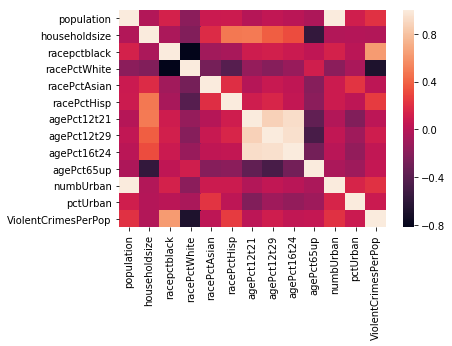

In [14]:
sns.heatmap(dataset_population_with_crimes.corr())

Biorąc pod uwagę dane dotyczące pochodzenia etnicznego oraz wieku populacji największe powiązanie z ilością przestępstw wykazuje współczynnik ``racepctblack``, ``racePctHisp`` oraz ``population``. Odwrotnie powiązany ze zmienną jest współczynnik ``racePctWhite``.

#### Dochód

Kolejna część obserwacji dotyczy dochodów.

In [15]:
dataset_income = dataset.loc[:, 'medIncome':'PctPopUnderPov']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_income_with_crimes = pd.concat([dataset_income, viol_crimes], axis=1)
dataset_income_with_crimes.head()

,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,ViolentCrimesPerPop
0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,41.02
1,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,127.56
2,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,218.59
3,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,306.64
4,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000.0,1328,2855,29.99,NaN


In [16]:
dataset_income.describe().T

,count,mean,std,min,25%,50%,75%,max
medIncome,2215.0,33984.696163,13424.680011,8866.00,23817.000,31441.00,41480.500,123625.00
pctWWage,2215.0,78.312758,7.950672,31.68,73.400,78.61,84.030,96.76
pctWFarmSelf,2215.0,0.881842,0.689006,0.00,0.460,0.69,1.100,6.53
pctWInvInc,2215.0,43.750935,12.787925,5.81,34.680,42.88,52.740,89.04
pctWSocSec,2215.0,26.409418,8.295604,4.81,20.770,26.59,31.715,76.39
pctWPubAsst,2215.0,6.801445,4.700335,0.18,3.270,5.61,9.105,44.82
pctWRetire,2215.0,15.969002,4.622553,3.46,12.875,15.65,18.755,45.51
medFamInc,2215.0,39857.055079,14251.206032,10447.00,29538.000,36678.00,46999.000,139008.00
perCapInc,2215.0,15603.524605,6281.558523,5237.00,11602.500,14101.00,17795.000,63302.00
whitePerCap,2215.0,16567.698420,6346.840251,5472.00,12610.500,15073.00,18609.500,68850.00


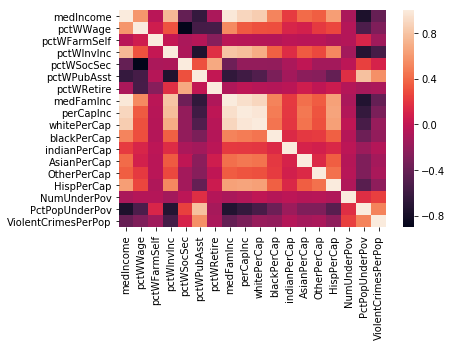

In [17]:
sns.heatmap(dataset_income_with_crimes.corr())

Biorąc pod uwagę dane dotyczące dochodu populacji największe powiązanie z ilością przestępstw wykazuje współczynnik ``pctWPubAsst``, ``NumUnderPov`` oraz ``PctPopUnderPov``. Odwrotnie powiązany ze zmienną jest współczynnik ``pctWInvInc``.

#### Edukacja oraz zatrudnienie

Kolejna część obserwacji dotyczy edukacji oraz zatrudnienia.

In [18]:
dataset_education = dataset.loc[:, 'PctLess9thGrade':'PctOccupMgmtProf']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_education_with_crimes = pd.concat([dataset_education, viol_crimes], axis=1)
dataset_education_with_crimes.head()

,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,ViolentCrimesPerPop
0,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,41.02
1,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,127.56
2,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,218.59
3,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,306.64
4,12.15,23.06,25.28,9.08,52.44,6.89,36.54,10.94,27.80,NaN


In [19]:
dataset_education.describe().T

,count,mean,std,min,25%,50%,75%,max
PctLess9thGrade,2215.0,9.186646,6.666703,0.20,4.640,7.74,11.835,49.89
PctNotHSGrad,2215.0,22.305120,10.989517,1.46,13.920,21.38,29.195,73.66
PctBSorMore,2215.0,23.056876,12.687213,1.63,14.095,19.65,29.055,79.18
PctUnemployed,2215.0,6.045242,2.895618,1.32,4.045,5.45,7.440,31.23
PctEmploy,2215.0,62.021612,8.312045,24.82,56.490,62.44,67.825,84.67
PctEmplManu,2215.0,18.228907,8.099281,2.05,12.215,17.30,23.400,50.03
PctEmplProfServ,2215.0,24.532298,6.659470,8.69,20.075,23.39,27.590,62.67
PctOccupManu,2215.0,13.819165,6.430264,1.37,9.130,13.15,17.665,44.27
PctOccupMgmtProf,2215.0,28.209201,9.326123,6.48,21.910,26.24,32.815,64.97


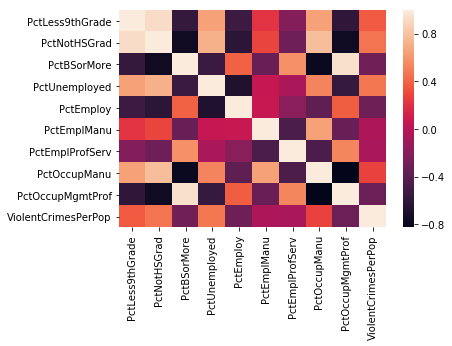

In [20]:
sns.heatmap(dataset_education_with_crimes.corr())

Biorąc pod uwagę dane dotyczące edukacji oraz zatrudnienia populacji największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctNotHSGrad``, ``PctLess9thGrade``, ``PctOccupManu``, oraz ``PctUnemployed``.

#### Życie rodzinne

Kolejna część obserwacji dotyczy życia rodzinnego.

In [21]:
dataset_family = dataset.loc[:, 'MalePctDivorce':'PctKidsBornNeverMar']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_family_with_crimes = pd.concat([dataset_family, viol_crimes], axis=1)
dataset_family_with_crimes.head()

,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,ViolentCrimesPerPop
0,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,41.02
1,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,127.56
2,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,218.59
3,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,306.64
4,7.51,50.66,11.64,9.73,2.98,58.59,55.20,66.51,79.17,61.22,68.94,402,4.70,NaN


In [22]:
dataset_family.describe().T

,count,mean,std,min,25%,50%,75%,max
MalePctDivorce,2215.0,9.127585,2.802747,2.13,7.110,9.15,11.050,20.08
MalePctNevMarr,2215.0,30.683517,8.127991,12.06,25.450,29.00,33.410,76.60
FemalePctDiv,2215.0,12.325300,3.262613,3.35,9.860,12.52,14.745,23.92
TotalPctDiv,2215.0,10.812515,3.000883,2.83,8.575,10.90,12.985,22.23
PersPerFam,2215.0,3.129698,0.240743,2.29,2.990,3.10,3.220,4.64
PctFam2Par,2215.0,74.059129,10.525952,22.97,67.900,75.03,81.900,93.60
PctKids2Par,2215.0,71.227255,12.045048,18.30,63.990,72.53,80.395,92.58
PctYoungKids2Par,2215.0,81.865422,12.263736,8.70,74.780,83.99,91.675,100.00
PctTeen2Par,2215.0,75.521788,10.365262,20.20,70.170,76.92,82.765,97.34
PctWorkMomYoungKids,2215.0,60.542641,8.008937,24.42,55.430,60.71,65.985,87.97


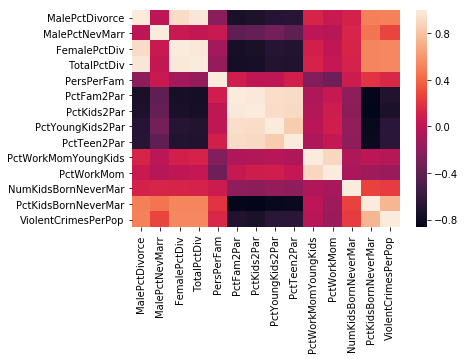

In [23]:
sns.heatmap(dataset_family_with_crimes.corr())

Biorąc pod uwagę dane dotyczące życia rodzinnego populacji największe powiązanie z ilością przestępstw wykazuje współczynnik 
``NumKidsBornNeverMart``, ``FemalePctDiv`` oraz ``TotalPctDiv``. Odwrotnie powiązany ze zmienną jest współczynnik ``PctKids2Par``.

#### Imigranci

Kolejna część obserwacji dotyczy imigrantów oraz znajomości języka angielskiego.

In [24]:
dataset_immigration = dataset.loc[:, 'NumImmig':'PctNotSpeakEnglWell']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_immigration_with_crimes = pd.concat([dataset_immigration, viol_crimes], axis=1)
dataset_immigration_with_crimes.head()

,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,ViolentCrimesPerPop
0,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,41.02
1,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,127.56
2,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,218.59
3,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,306.64
4,196,46.94,56.12,67.86,69.90,0.82,0.98,1.18,1.22,94.64,0.39,NaN


In [25]:
dataset_immigration.describe().T

,count,mean,std,min,25%,50%,75%,max
NumImmig,2215.0,6277.273589,55419.653828,20.00,400.000,1024.00,3302.000,2082931.00
PctImmigRecent,2215.0,13.525693,9.780098,0.00,6.695,12.26,17.950,64.29
PctImmigRec5,2215.0,20.421287,12.410355,0.00,11.255,19.08,27.445,76.16
PctImmigRec8,2215.0,27.544181,14.368813,0.00,17.205,26.72,36.495,80.81
PctImmigRec10,2215.0,34.733928,16.327322,0.00,22.725,34.79,46.185,88.00
PctRecentImmig,2215.0,1.099124,1.595766,0.00,0.170,0.50,1.310,13.71
PctRecImmig5,2215.0,1.697463,2.461060,0.00,0.280,0.75,2.015,19.93
PctRecImmig8,2215.0,2.307503,3.286648,0.00,0.390,1.04,2.700,25.34
PctRecImmig10,2215.0,2.943761,4.246468,0.00,0.520,1.31,3.455,32.63
PctSpeakEnglOnly,2215.0,87.074993,14.076087,6.15,84.380,92.18,95.455,98.98


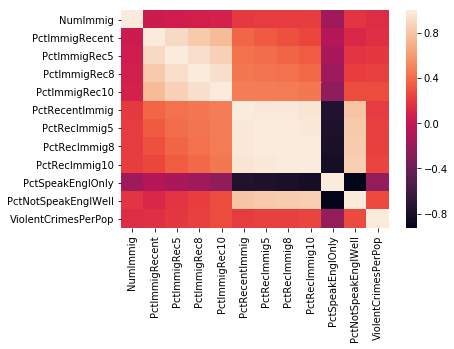

In [26]:
sns.heatmap(dataset_immigration_with_crimes.corr())

Biorąc pod uwagę pochodzenie populacji widzimy, że nie ma ono znacznego wpływu na ilość przestępstw. Niemniej jednak, wśród nich największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctNotSpeakEnglWell`` oraz ``PctImmigRec10``. 
Odwrotnie powiązany ze zmienną jest współczynnik ``PctSpeakEnglOnly``.

#### Warunki zamieszkania

Kolejna część obserwacji dotyczy warunków w jakich mieszka populacja.

In [27]:
dataset_living_condition = dataset.loc[:, 'PctLargHouseFam':'MedNumBR']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_living_condition_with_crimes = pd.concat([dataset_living_condition, viol_crimes], axis=1)
dataset_living_condition_with_crimes.head()

,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,ViolentCrimesPerPop
0,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,41.02
1,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,127.56
2,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,218.59
3,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,306.64
4,5.23,3.11,2.35,2.55,2.12,58.13,2.94,55.64,2,NaN


In [28]:
dataset_living_condition.describe().T

,count,mean,std,min,25%,50%,75%,max
PctLargHouseFam,2215.0,5.386619,3.794309,0.96,3.390,4.28,5.870,34.87
PctLargHouseOccup,2215.0,3.915788,3.175770,0.44,2.370,3.05,4.210,30.87
PersPerOccupHous,2215.0,2.615842,0.315646,1.58,2.410,2.57,2.770,4.52
PersPerOwnOccHous,2215.0,2.740483,0.297421,1.61,2.550,2.71,2.900,4.48
PersPerRentOccHous,2215.0,2.367138,0.391806,1.55,2.110,2.29,2.530,4.73
PctPersOwnOccup,2215.0,66.369454,14.182588,13.93,57.285,65.91,76.580,97.24
PctPersDenseHous,2215.0,4.132438,5.599131,0.05,1.290,2.34,4.730,59.49
PctHousLess3BR,2215.0,45.405341,13.778347,3.06,37.505,46.39,53.515,95.34
MedNumBR,2215.0,2.640632,0.512686,1.00,2.000,3.00,3.000,4.00


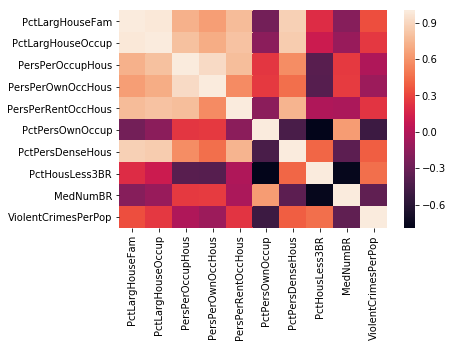

In [29]:
sns.heatmap(dataset_living_condition_with_crimes.corr())

In [30]:
dataset_living_condition_with_crimes.corr().iloc[:, -1:]

,ViolentCrimesPerPop
PctLargHouseFam,0.341601
PctLargHouseOccup,0.257216
PersPerOccupHous,-0.017701
PersPerOwnOccHous,-0.099170
PersPerRentOccHous,0.240564
PctPersOwnOccup,-0.507330
PctPersDenseHous,0.395856
PctHousLess3BR,0.454470
MedNumBR,-0.347150
ViolentCrimesPerPop,1.000000


Biorąc pod uwagę warunki zamieszkania populacji największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctHousLess3BR`` oraz ``PctPersDenseHous``. Odwrotnie powiązany ze zmienną jest współczynnik ``PctPersOwnOccup``.

#### Stan zabudowań

Kolejna część obserwacji dotyczy stanu zabudowań - czy są one zamieszkane, niezamieszkane, jak długo itp.

In [31]:
dataset_household = dataset.loc[:, 'HousVacant':'OwnOccQrange']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_household_with_crimes = pd.concat([dataset_household, viol_crimes], axis=1)
dataset_household_with_crimes.head()

,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,ViolentCrimesPerPop
0,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,41.02
1,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,127.56
2,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,218.59
3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,306.64
4,333,92.45,53.57,3.90,42.64,1958,7.45,0.82,30600,43200,59500,28900,NaN


In [32]:
dataset_household.describe().T

,count,mean,std,min,25%,50%,75%,max
HousVacant,2215.0,1748.368849,6503.866478,36.00,304.500,558.00,1228.000,172768.00
PctHousOccup,2215.0,92.933973,5.040736,37.47,91.290,94.21,96.020,99.00
PctHousOwnOcc,2215.0,63.368298,13.970057,16.86,54.820,62.83,72.645,96.49
PctVacantBoarded,2215.0,2.778524,3.592396,0.00,0.720,1.66,3.430,39.89
PctVacMore6Mos,2215.0,34.773887,13.911468,3.12,24.480,34.10,43.970,82.13
MedYrHousBuilt,2215.0,1962.623476,11.166555,1939.00,1956.000,1964.00,1971.000,1987.00
PctHousNoPhone,2215.0,4.289824,4.088175,0.00,0.905,2.85,6.805,23.88
PctWOFullPlumb,2215.0,0.425273,0.426188,0.00,0.160,0.32,0.555,5.33
OwnOccLowQuart,2215.0,88695.802257,66670.781534,14999.00,41500.000,65500.00,121500.000,500001.00
OwnOccMedVal,2215.0,113097.523251,81906.362277,19500.00,56200.000,82800.00,150600.000,500001.00


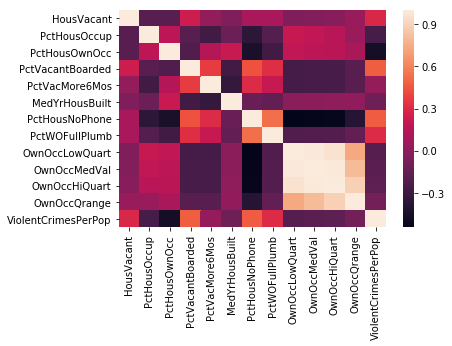

In [33]:
sns.heatmap(dataset_household_with_crimes.corr())

Biorąc pod uwagę stan zabudowań największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctVacantBoarded`` oraz ``PctHousNoPhone``. Odwrotnie powiązany ze zmienną jest współczynnik ``PctHousOwnOcc``.

#### Wysokość czynszu

Kolejna część obserwacji dotyczy wysokości czynszu np. jaką część dochodu on stanowi.

In [34]:
dataset_rent = dataset.loc[:, 'RentLowQ':'MedOwnCostPctIncNoMtg']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_rent_with_crimes = pd.concat([dataset_rent, viol_crimes], axis=1)
dataset_rent_with_crimes.head()

,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,ViolentCrimesPerPop
0,685,1001,1001,316,1001,23.8,21.1,14.0,41.02
1,467,560,672,205,627,27.6,20.7,12.5,127.56
2,370,428,520,150,484,24.1,21.7,11.6,218.59
3,195,250,309,114,333,28.7,20.6,14.5,306.64
4,202,283,362,160,332,32.2,23.2,12.9,NaN


In [35]:
dataset_rent.describe().T

,count,mean,std,min,25%,50%,75%,max
RentLowQ,2215.0,329.966591,144.138461,99.0,213.5,307.0,421.0,1001.0
RentMedian,2215.0,428.537246,170.706644,120.0,289.5,397.0,544.0,1001.0
RentHighQ,2215.0,527.252822,199.290780,182.0,366.0,486.0,659.5,1001.0
RentQrange,2215.0,197.286230,85.205688,0.0,139.0,171.0,232.5,803.0
MedRent,2215.0,501.466366,169.271735,192.0,364.0,467.0,615.0,1001.0
MedRentPctHousInc,2215.0,26.298104,2.979297,14.9,24.3,26.1,28.0,35.1
MedOwnCostPctInc,2215.0,20.990158,2.987622,14.0,18.7,21.0,23.1,32.7
MedOwnCostPctIncNoMtg,2215.0,13.010203,1.419679,10.1,12.0,12.8,13.7,23.4


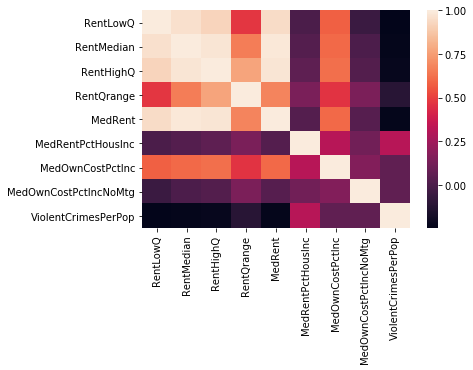

In [36]:
sns.heatmap(dataset_rent_with_crimes.corr())

Biorąc pod uwagę wysokość czynszu największe powiązanie z ilością przestępstw wykazuje współczynnik ``MedRentPctHousInc``. Łatwo można zauważyć, że większość współczynników wysokości czynszu jest odwrotnie powiązana z ilością przestępstw. Możemy więc wyciągnąć wniosek, że wraz ze wzrtostem cen spada ilość przestępstw.

#### Liczba osób bezdomnych

Kolejna część obserwacji dotyczy osób bezdomnych.

In [37]:
dataset_homeless = dataset.loc[:, 'NumInShelters':'NumStreet']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_homeless_with_crimes = pd.concat([dataset_homeless, viol_crimes], axis=1)
dataset_homeless_with_crimes.head()

,NumInShelters,NumStreet,ViolentCrimesPerPop
0,11,0,41.02
1,0,0,127.56
2,16,0,218.59
3,0,0,306.64
4,2,0,NaN


In [38]:
dataset_homeless.describe().T

,count,mean,std,min,25%,50%,75%,max
NumInShelters,2215.0,66.953499,564.253149,0.0,0.0,0.0,22.0,23383.0
NumStreet,2215.0,17.823476,245.452553,0.0,0.0,0.0,1.0,10447.0


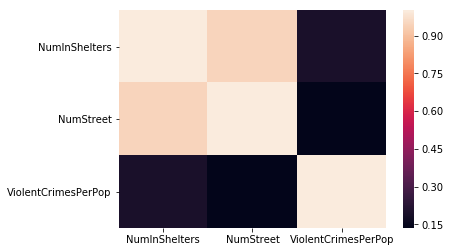

In [39]:
sns.heatmap(dataset_homeless_with_crimes.corr())

Biorąc pod uwagę liczbę osób bezdomnych widać, że wbrew przypuszczeniom, współczynniki te są odwrotnie powiązane z z ilością przestępstw.

#### Miejsce urodzenia

Kolejna część obserwacji dotyczy miejsca urodzenia - czy osoby urodziły się w stanie w którym obecnie mieszkają itp.

In [40]:
dataset_born = dataset.loc[:, 'PctForeignBorn':'PctSameState85']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_born_with_crimes = pd.concat([dataset_born, viol_crimes], axis=1)
dataset_born_with_crimes.head()

,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,10.66,53.72,65.29,78.09,89.14,41.02
1,8.30,77.17,71.27,90.22,96.12,127.56
2,5.00,44.77,36.60,61.26,82.85,218.59
3,2.04,88.71,56.70,90.17,96.24,306.64
4,1.74,73.75,42.22,60.34,89.02,NaN


In [41]:
dataset_born.describe().T

,count,mean,std,min,25%,50%,75%,max
PctForeignBorn,2215.0,7.340302,8.418476,0.18,2.060,4.31,9.250,60.40
PctBornSameState,2215.0,61.539630,16.750061,6.75,50.110,64.49,74.855,93.14
PctSameHouse85,2215.0,51.538596,10.517926,11.83,44.995,52.17,58.740,78.56
PctSameCity85,2215.0,77.411079,10.878186,27.95,72.060,79.49,85.135,96.59
PctSameState85,2215.0,88.111865,7.287836,32.83,85.200,90.03,93.010,99.90


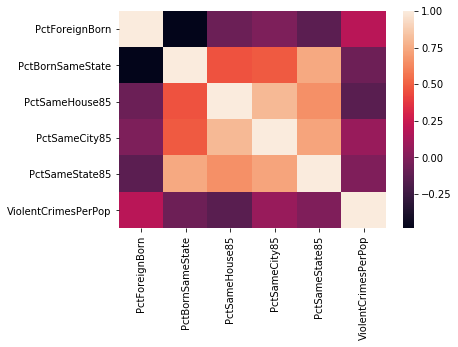

In [42]:
sns.heatmap(dataset_born_with_crimes.corr())

Biorąc pod uwagę miejsce urodzenia współczynniki nie mają zbyt dużego wpływu na ilość przestępstw. Najbardziej z nich powiązany jest współczynnik ``PctForeignBorn``, a najbardziej odwrotnie powiązany jest współczynnik ``PctSameHouse85``.

#### Policjanci

Kolejna część obserwacji dotyczy policjantów - m.in. liczba policjantów na 100 tys. osób w populacji.

In [43]:
dataset_police = dataset.loc[:, 'LemasSwornFT':'PolicPerPop']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_police_with_crimes = pd.concat([dataset_police, viol_crimes], axis=1)
dataset_police_with_crimes.head()

,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,ViolentCrimesPerPop
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.02
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.56
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.59
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.64
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dataset_police.describe().T

,count,mean,std,min,25%,50%,75%,max
LemasSwornFT,343.0,499.198251,1681.472251,65.00,131.000,173.00,314.000,25655.00
LemasSwFTPerPop,343.0,246.490962,273.799162,29.40,149.115,196.01,260.650,3437.23
LemasSwFTFieldOps,343.0,432.559767,1493.708385,14.00,114.000,152.00,285.500,22496.00
LemasSwFTFieldPerPop,343.0,210.844781,235.478815,19.21,132.245,170.27,226.815,3290.62
LemasTotalReq,343.0,252404.988338,689449.781653,2100.00,49864.500,90000.00,171923.500,8328470.00
LemasTotReqPerPop,343.0,120651.718892,148211.342163,2704.80,64845.050,91034.60,130324.650,1926281.50
PolicReqPerOffic,343.0,523.658309,307.839007,20.80,343.350,443.20,637.250,2162.50
PolicPerPop,343.0,246.493586,273.798409,29.40,149.150,196.00,260.650,3437.20


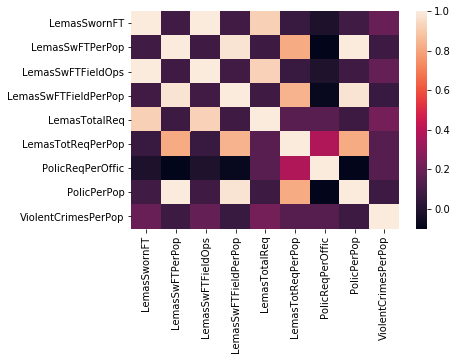

In [45]:
sns.heatmap(dataset_police_with_crimes.corr())

Dane dotyczące liczby policjantów mają znaczne braki i niekoniecznie oddają rzeczywisty charakter całości zbioru. Widać jednak, że tutaj wszystkie współczynniki są dodatnio skorelowane z ilością popełnianych przestępstw.

#### Rasa policjantów

Kolejna część obserwacji dotyczy procentu policjantów, jaki stanowią poszczególne rasy ludzkie.

In [46]:
dataset_race = dataset.loc[:, 'RacialMatchCommPol':'PctPolicMinor']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_race_with_crimes = pd.concat([dataset_race, viol_crimes], axis=1)
dataset_race_with_crimes.head()

,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,ViolentCrimesPerPop
0,NaN,NaN,NaN,NaN,NaN,NaN,41.02
1,NaN,NaN,NaN,NaN,NaN,NaN,127.56
2,NaN,NaN,NaN,NaN,NaN,NaN,218.59
3,NaN,NaN,NaN,NaN,NaN,NaN,306.64
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dataset_race.describe().T

,count,mean,std,min,25%,50%,75%,max
RacialMatchCommPol,343.0,85.499679,10.941312,42.15,79.435,87.93,93.645,100.00
PctPolicWhite,343.0,82.515831,15.332612,1.60,76.230,86.18,93.340,100.00
PctPolicBlack,343.0,9.263294,11.021424,0.00,2.020,5.00,14.065,67.31
PctPolicHisp,343.0,5.459767,10.604533,0.00,0.415,2.04,6.215,98.40
PctPolicAsian,343.0,0.681283,1.706344,0.00,0.000,0.00,0.650,18.57
PctPolicMinor,343.0,15.242245,14.826756,0.00,4.950,11.37,19.740,98.40


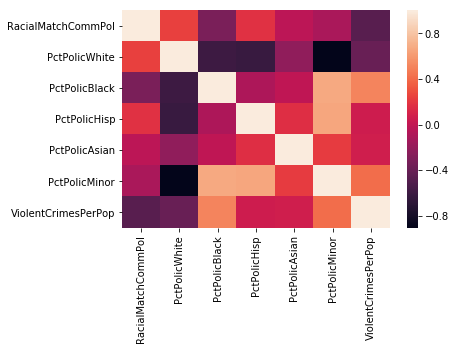

In [48]:
sns.heatmap(dataset_race_with_crimes.corr())

Te dane również są znacznie wybrakowane. Największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctPolicBlack``. Odwrotnie powiązany ze zmienna jest współczynnik ``RacialMatchCommPol	``

#### Pozostałe atrybuty

Ostatnia część obserwacji to połączone pozostałe atrybuty zbioru.

In [49]:
dataset_other = dataset.loc[:, 'OfficAssgnDrugUnits':'PolicBudgPerPop']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_other_with_crimes = pd.concat([dataset_other, viol_crimes], axis=1)
dataset_other_with_crimes.head()

,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,41.02
1,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,127.56
2,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,218.59
3,NaN,NaN,NaN,5.2,3217.7,3.31,NaN,NaN,NaN,NaN,0.0,NaN,306.64
4,NaN,NaN,NaN,11.5,974.2,0.38,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [50]:
dataset_other.describe().T

,count,mean,std,min,25%,50%,75%,max
OfficAssgnDrugUnits,343.0,2.628863e+01,1.008219e+02,0.00,6.000,12.00,2.300000e+01,1.773000e+03
NumKindsDrugsSeiz,343.0,8.816327e+00,2.836391e+00,1.00,7.000,9.00,1.050000e+01,1.500000e+01
PolicAveOTWorked,343.0,1.191143e+02,9.249519e+01,0.00,55.100,98.70,1.535500e+02,6.347000e+02
LandArea,2215.0,2.741995e+01,1.098226e+02,0.90,7.300,13.70,2.610000e+01,3.569800e+03
PopDens,2215.0,2.783835e+03,2.828993e+03,10.00,1181.900,2027.30,3.321700e+03,4.422990e+04
PctUsePubTrans,2215.0,3.041124e+00,4.912917e+00,0.00,0.360,1.22,3.365000e+00,5.433000e+01
PolicCars,343.0,1.854781e+02,3.185428e+02,20.00,54.000,86.00,1.895000e+02,3.187000e+03
PolicOperBudg,343.0,3.217602e+07,1.104566e+08,2380215.00,7275059.500,11164110.00,2.014754e+07,1.617293e+09
LemasPctPolicOnPatr,343.0,8.713093e+01,1.034961e+01,10.85,84.295,89.58,9.320000e+01,9.994000e+01
LemasGangUnitDeploy,343.0,4.285714e+00,4.064538e+00,0.00,0.000,5.00,1.000000e+01,1.000000e+01


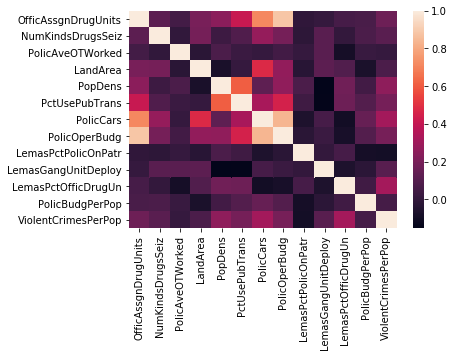

In [51]:
sns.heatmap(dataset_other_with_crimes.corr())

Te współczynniki nie są zbyt silnie skorelowane z ilością przestępstw. Warto też wspomieć, że część z nich jest mocno wybrakowana. Najbardziej powiązany z cechą jest współczynnik ``PopDens``, a odwrotnie powiązany jest ``LemasPctPolicOnPatr``.

### Dane najbardziej znaczące dla szukanego współczynnika przestępstw

In [52]:
dataset_train = dataset.loc[:, 'population':'PolicBudgPerPop']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_education_with_viol_crimes = pd.concat([dataset_train, viol_crimes], axis=1)

CORR_THRESHOLD_VALUE = 0.3

corr = dataset_education_with_viol_crimes.corr()
abs(corr[corr["ViolentCrimesPerPop"] > CORR_THRESHOLD_VALUE]["ViolentCrimesPerPop"] ).sort_values(ascending=False)

ViolentCrimesPerPop    1.000000
PctKidsBornNeverMar    0.738089
racepctblack           0.628368
pctWPubAsst            0.563107
FemalePctDiv           0.537303
TotalPctDiv            0.536549
PctPolicBlack          0.513569
MalePctDivorce         0.510456
PctPopUnderPov         0.505349
PctUnemployed          0.483441
PctVacantBoarded       0.479910
PctHousNoPhone         0.473718
PctNotHSGrad           0.467596
PctHousLess3BR         0.454470
PctPolicMinor          0.416418
PctPersDenseHous       0.395856
PctLess9thGrade        0.371422
PctLargHouseFam        0.341601
LemasPctOfficDrugUn    0.318474
MedRentPctHousInc      0.315537
PolicCars              0.313164
PctWOFullPlumb         0.311227
Name: ViolentCrimesPerPop, dtype: float64

### Wizualizacja danych 

#### Wykresy przedstawiające liczbę przestęstw na 100 tysięcy osób

In [53]:
crimedata_state = dataset.groupby('state').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()

data1 = dict(type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'Przestępstwa bez użycia siły na 100 tys. osób.'}
        )

layout1 = dict(
        title = 'Liczba przestępstw bez użycia siły(non-Violent Crimes) z podziałem na stany',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )
    
fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)


data2 = dict(type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype(float),
        colorbar = {'title':'Przestępstwa z użyciem siły na 100 tys. osób.'}
        )

layout2 = dict(
        title = 'Liczba przestępstw z użyciem siły(Violent Crimes) z podziałem na stany',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)

#### Pobranie danych dotyczących długości i szerowkości geograficznej gmin i miast

Za pomocą API https://opencagedata.com/ zostały pobrane współrzędne geograficzne miast oraz gmin, a następnie umieszczone zostały w pliku ``../Data/cities.txt``. 

#### Wykresy przedstawiające społeczności z największym współczynnikiem przestępstw

In [54]:
cities_dataset = pd.read_csv('../Data/cities_dataset.txt')

In [55]:
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
non_viol_crimes = dataset.loc[:, 'nonViolPerPop']

cities_with_crime_dataset = pd.concat([cities_dataset, non_viol_crimes, viol_crimes], axis=1)

In [56]:
cities_with_crime_dataset.head()

,communityname,state,lat,lng,nonViolPerPop,ViolentCrimesPerPop
0,BerkeleyHeightstownship,NJ,40.683435,-74.442653,1394.59,41.02
1,Marpletownship,PA,39.977611,-75.378526,1955.95,127.56
2,Tigardcity,OR,45.430747,-122.771934,6167.51,218.59
3,Gloversvillecity,NY,43.052813,-74.343690,NaN,306.64
4,Bemidjicity,MN,47.478542,-94.890787,9988.79,NaN


In [57]:
dl = cities_with_crime_dataset.shape[0]
df = cities_with_crime_dataset.copy().sort_values(by='nonViolPerPop', ascending=False)

df['text'] = df.apply(lambda row: row.communityname + '\n ' + str(row.nonViolPerPop), axis = 1) 
limits = [(51, 100), (31, 50), (16, 30), (6, 15), (0, 5)]
colors = ['#5d0909', '#d11515', '#ed4545', '#f6a2a2', '#fde8e8']
cities = []
scale = 100

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['nonViolPerPop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Społeczności z największym współczynnikiem przestępstw bez użycia siły(non-Violent Crimes)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            )
    )

fig.show()

In [58]:
dl = cities_with_crime_dataset.shape[0]
df = cities_with_crime_dataset.copy().sort_values(by='ViolentCrimesPerPop', ascending=False)

df['text'] = df.apply(lambda row: row.communityname + '\n ' + str(row.nonViolPerPop), axis = 1) 
limits = [(51, 100), (31, 50), (16, 30), (6, 15), (0, 5)]
colors = ['#5d0909', '#d11515', '#ed4545', '#f6a2a2', '#fde8e8']
cities = []
scale = 25

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['ViolentCrimesPerPop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Społeczności z największym współczynnikiem przestępstw z użyciem siły(non-Violent Crimes)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            )
    )

fig.show()

## Model regresji

### Wczytanie danych znormalizowanych

In [59]:
columns = [ "state numeric", "county numeric", "community numeric", "communityname string", "fold numeric", "population numeric", "householdsize numeric", "racepctblack numeric", "racePctWhite numeric", "racePctAsian numeric", "racePctHisp numeric", "agePct12t21 numeric", "agePct12t29 numeric", "agePct16t24 numeric", "agePct65up numeric", "numbUrban numeric", "pctUrban numeric", "medIncome numeric", "pctWWage numeric", "pctWFarmSelf numeric", "pctWInvInc numeric", "pctWSocSec numeric", "pctWPubAsst numeric", "pctWRetire numeric", "medFamInc numeric", "perCapInc numeric", "whitePerCap numeric", "blackPerCap numeric", "indianPerCap numeric", "AsianPerCap numeric", "OtherPerCap numeric", "HispPerCap numeric", "NumUnderPov numeric", "PctPopUnderPov numeric", "PctLess9thGrade numeric", "PctNotHSGrad numeric", "PctBSorMore numeric", "PctUnemployed numeric", "PctEmploy numeric", "PctEmplManu numeric", "PctEmplProfServ numeric", "PctOccupManu numeric", "PctOccupMgmtProf numeric", "MalePctDivorce numeric", "MalePctNevMarr numeric", "FemalePctDiv numeric", "TotalPctDiv numeric", "PersPerFam numeric", "PctFam2Par numeric", "PctKids2Par numeric", "PctYoungKids2Par numeric", "PctTeen2Par numeric", "PctWorkMomYoungKids numeric", "PctWorkMom numeric", "NumIlleg numeric", "PctIlleg numeric", "NumImmig numeric", "PctImmigRecent numeric", "PctImmigRec5 numeric", "PctImmigRec8 numeric", "PctImmigRec10 numeric", "PctRecentImmig numeric", "PctRecImmig5 numeric", "PctRecImmig8 numeric", "PctRecImmig10 numeric", "PctSpeakEnglOnly numeric", "PctNotSpeakEnglWell numeric", "PctLargHouseFam numeric", "PctLargHouseOccup numeric", "PersPerOccupHous numeric", "PersPerOwnOccHous numeric", "PersPerRentOccHous numeric", "PctPersOwnOccup numeric", "PctPersDenseHous numeric", "PctHousLess3BR numeric", "MedNumBR numeric", "HousVacant numeric", "PctHousOccup numeric", "PctHousOwnOcc numeric", "PctVacantBoarded numeric", "PctVacMore6Mos numeric", "MedYrHousBuilt numeric", "PctHousNoPhone numeric", "PctWOFullPlumb numeric", "OwnOccLowQuart numeric", "OwnOccMedVal numeric", "OwnOccHiQuart numeric", "RentLowQ numeric", "RentMedian numeric", "RentHighQ numeric", "MedRent numeric", "MedRentPctHousInc numeric", "MedOwnCostPctInc numeric", "MedOwnCostPctIncNoMtg numeric", "NumInShelters numeric", "NumStreet numeric", "PctForeignBorn numeric", "PctBornSameState numeric", "PctSameHouse85 numeric", "PctSameCity85 numeric", "PctSameState85 numeric", "LemasSwornFT numeric", "LemasSwFTPerPop numeric", "LemasSwFTFieldOps numeric", "LemasSwFTFieldPerPop numeric", "LemasTotalReq numeric", "LemasTotReqPerPop numeric", "PolicReqPerOffic numeric", "PolicPerPop numeric", "RacialMatchCommPol numeric", "PctPolicWhite numeric", "PctPolicBlack numeric", "PctPolicHisp numeric", "PctPolicAsian numeric", "PctPolicMinor numeric", "OfficAssgnDrugUnits numeric", "NumKindsDrugsSeiz numeric", "PolicAveOTWorked numeric", "LandArea numeric", "PopDens numeric", "PctUsePubTrans numeric", "PolicCars numeric", "PolicOperBudg numeric", "LemasPctPolicOnPatr numeric", "LemasGangUnitDeploy numeric", "LemasPctOfficDrugUn numeric", "PolicBudgPerPop numeric", "ViolentCrimesPerPop numeric" ]
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data", names=columns)

Wymiary wczytanych danych.

In [60]:
dataset.shape

(1994, 128)

Zamiana znaku ``?`` na wartość ``np.nan``.

In [61]:
dataset.replace("?", np.nan, inplace=True)

In [62]:
dataset.head()

,state numeric,county numeric,community numeric,communityname string,fold numeric,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,...,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric,ViolentCrimesPerPop numeric
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [63]:
dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 128 columns):
state numeric                    1994 non-null int64
county numeric                   820 non-null object
community numeric                817 non-null object
communityname string             1994 non-null object
fold numeric                     1994 non-null int64
population numeric               1994 non-null float64
householdsize numeric            1994 non-null float64
racepctblack numeric             1994 non-null float64
racePctWhite numeric             1994 non-null float64
racePctAsian numeric             1994 non-null float64
racePctHisp numeric              1994 non-null float64
agePct12t21 numeric              1994 non-null float64
agePct12t29 numeric              1994 non-null float64
agePct16t24 numeric              1994 non-null float64
agePct65up numeric               1994 non-null float64
numbUrban numeric                1994 non-null float64
pctUrban numeric     

In [64]:
number_o_nulls = dataset.isna().sum(axis=0)
for i in range (0, dataset.shape[1]):
    if number_o_nulls[i] > 1000:
        print(dataset.columns[i], number_o_nulls[i])

county numeric 1174
community numeric 1177
LemasSwornFT numeric 1675
LemasSwFTPerPop numeric 1675
LemasSwFTFieldOps numeric 1675
LemasSwFTFieldPerPop numeric 1675
LemasTotalReq numeric 1675
LemasTotReqPerPop numeric 1675
PolicReqPerOffic numeric 1675
PolicPerPop numeric 1675
RacialMatchCommPol numeric 1675
PctPolicWhite numeric 1675
PctPolicBlack numeric 1675
PctPolicHisp numeric 1675
PctPolicAsian numeric 1675
PctPolicMinor numeric 1675
OfficAssgnDrugUnits numeric 1675
NumKindsDrugsSeiz numeric 1675
PolicAveOTWorked numeric 1675
PolicCars numeric 1675
PolicOperBudg numeric 1675
LemasPctPolicOnPatr numeric 1675
LemasGangUnitDeploy numeric 1675
PolicBudgPerPop numeric 1675


In [65]:
for i in range (0, dataset.shape[1]):
    if number_o_nulls[i] > 0:
        print(dataset.columns[i], number_o_nulls[i])

county numeric 1174
community numeric 1177
OtherPerCap numeric 1
LemasSwornFT numeric 1675
LemasSwFTPerPop numeric 1675
LemasSwFTFieldOps numeric 1675
LemasSwFTFieldPerPop numeric 1675
LemasTotalReq numeric 1675
LemasTotReqPerPop numeric 1675
PolicReqPerOffic numeric 1675
PolicPerPop numeric 1675
RacialMatchCommPol numeric 1675
PctPolicWhite numeric 1675
PctPolicBlack numeric 1675
PctPolicHisp numeric 1675
PctPolicAsian numeric 1675
PctPolicMinor numeric 1675
OfficAssgnDrugUnits numeric 1675
NumKindsDrugsSeiz numeric 1675
PolicAveOTWorked numeric 1675
PolicCars numeric 1675
PolicOperBudg numeric 1675
LemasPctPolicOnPatr numeric 1675
LemasGangUnitDeploy numeric 1675
PolicBudgPerPop numeric 1675
